<a href="https://colab.research.google.com/github/SeunginKimT/Data-Analysis/blob/main/%E7%AC%AC%EF%BC%98%E8%AA%B2%E9%A1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("222D0294" + "金承仁")

222D0294金承仁


In [ ]:
#• 共分散・相関係数を計算
#• 散布図を作成（自分独自のスタイルで）
#• 回帰直線を散布図に重ねる (自分独自のスタイルで)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install japanize-matplotlib
import japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 47.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=6568b331f48c513536fac6e547a4f23dbb2be6f3c3cba1c43a8e43b91c33dc89
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/データサイエンス入門/東京の最高気温（月平均）とアイスクリーム支出額.csv', index_col=0)

In [ ]:
df

,日最高気温の月平均(℃),アイスクリームの支出額（円）
年月,,
2014年1月,10.6,404
2014年2月,9.8,343
2014年3月,14.5,493
2014年4月,19.6,575
2014年5月,24.7,921
...,...,...
2023年8月,34.3,1851
2023年9月,31.2,1340
2023年10月,23.7,913


In [ ]:
cols = df.columns
cols

Index(['日最高気温の月平均(℃)', 'アイスクリームの支出額（円）'], dtype='object')

In [ ]:
#共分散
df.cov()
#分散共分散行列

,日最高気温の月平均(℃),アイスクリームの支出額（円）
日最高気温の月平均(℃),53.735405,2222.383803
アイスクリームの支出額（円）,2222.383803,113703.654832


In [ ]:
#相関係数は共分散を標準偏差で割ったもの→ pythonで求めた結果は、相関行列
df.corr()

,日最高気温の月平均(℃),アイスクリームの支出額（円）
日最高気温の月平均(℃),1.000000,0.899087
アイスクリームの支出額（円）,0.899087,1.000000


<Axes: title={'center': '月別日最高気温とアイスクリーム支出額'}, xlabel='日最高気温の月平均(℃)', ylabel='アイスクリームの支出額（円）'>

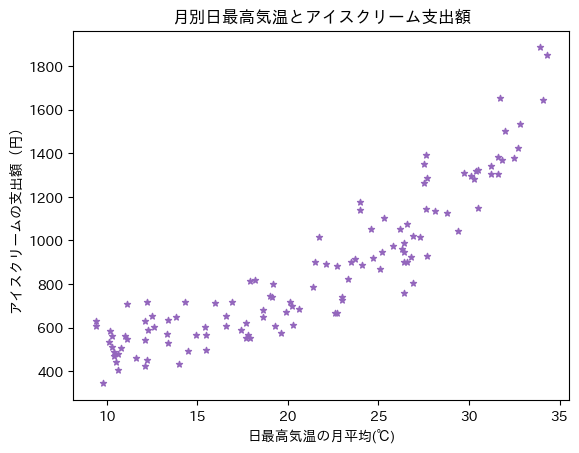

In [ ]:
#散布図
df.plot.scatter(x = '日最高気温の月平均(℃)',y =  'アイスクリームの支出額（円）', title = '月別日最高気温とアイスクリーム支出額',
                c = 'tab:purple', marker = '*')

In [ ]:
#回帰直線を求める
import numpy as np
from sklearn.linear_model import LinearRegression
x = df['日最高気温の月平均(℃)'].values[: , np.newaxis]
y = df['アイスクリームの支出額（円）'].values

print(x.shape)
print(y.shape)

(120, 1)
(120,)


In [ ]:
lr = LinearRegression().fit(x,y)

In [ ]:
#傾き
print('傾き: ' + str(lr.coef_))

#切片
print('切片: ' + str(lr.intercept_))

傾き: [41.35790515]
切片: -9.919087782013776


In [ ]:
lr.predict(x)

array([ 428.47470685,  395.38838273,  589.77053695,  800.69585324,
       1011.62116952, 1102.60856086, 1251.49701942, 1280.44755303,
       1102.60856086,  941.31273076,  709.7084619 ,  445.01786891,
        420.20312582,  420.20312582,  631.12844211,  788.28848169,
       1081.92960829, 1081.92960829, 1234.95385736, 1251.49701942,
       1081.92960829,  928.90535922,  726.25162396,  544.27684128,
        428.47470685,  494.6473551 ,  606.31369901,  829.64638685,
       1032.3001221 , 1077.79381777, 1218.41069529, 1296.99071509,
       1135.69488499,  924.7695687 ,  631.12844211,  560.82000334,
        436.74628788,  490.51156458,  544.27684128,  813.10322478,
       1028.16433159, 1081.92960829, 1305.26229612, 1247.3612289 ,
       1098.47277035,  821.37480581,  676.62213778,  449.15365943,
        378.84522067,  407.79575427,  689.02950932,  904.09061612,
       1007.48537901, 1090.20118932, 1342.48441076, 1334.21282973,
       1090.20118932,  941.31273076,  722.11583345,  490.51156

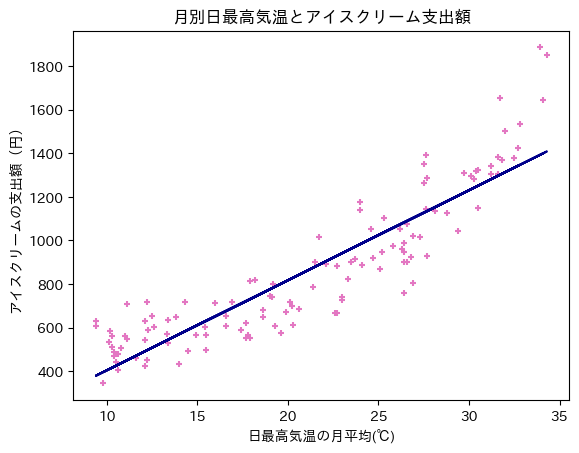

In [ ]:
df.plot.scatter(x = '日最高気温の月平均(℃)',y =  'アイスクリームの支出額（円）', title = '月別日最高気温とアイスクリーム支出額',
                c = 'tab:pink', marker = '+')
plt.plot(x, lr.predict(x), color = 'darkblue')